In [1]:
# Import modules
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
# Define data filepath
pathname = r'/Users/ajhth/Documents/GitHub/geospatial-data-science/labs/lab2/'

# Read data
df = gpd.read_file(pathname + 'or_1992-2018.shp') # 'df' stands for DataFrame

In [12]:
#Question 1a - Answer: Wasco County
df_large50 = df[df['FIRE_SIZE'] > 50]
df_large_human = df_large50[df_large50['NWCG_CAUSE'] == 'Human'].copy()
df_large_human['FIPS_NAME'].describe()

count              627
unique              38
top       Wasco County
freq                71
Name: FIPS_NAME, dtype: object

In [21]:
#Question 1b - Answer: Month 8 (August)
df_large100 = df[df['FIRE_SIZE'] > 100]
df_large_natural = df_large100[df_large100['NWCG_CAUSE'] == 'Natural'].copy()
datetime = pd.to_datetime(df_large_natural['DISCOVERY_'], format='%Y/%m/%d %H:%M:%S.%f')
df_large_natural['datetime'] = datetime
large_fire_count = df_large100.iloc[:,0].groupby(df_large_natural['datetime'].dt.month).count()
large_fire_count

datetime
4.0       2
5.0       6
6.0      98
7.0     410
8.0     549
9.0      93
10.0      6
Name: OBJECTID, dtype: int64

In [19]:
#Question 1c - Answer: 9
df_large200 = df[df['FIRE_SIZE'] > 200]
df_large_undetermined = df_large200[df_large200['NWCG_CAUSE'] == 'Missing data/not specified/undetermined'].copy()
df_large_undetermined['FIPS_NAME'].describe()


count                   9
unique                  9
top       Umatilla County
freq                    1
Name: FIPS_NAME, dtype: object

In [33]:
#Question 1d - Answer: Long Draw, Malheur County, 2012/07/08
df_largest = df
size = df_largest['FIRE_SIZE'].max()
df_largest = df_largest[df_largest['FIRE_SIZE'] == size].copy()
df_largest['FIRE_NAME'].describe()

count             1
unique            1
top       LONG DRAW
freq              1
Name: FIRE_NAME, dtype: object

In [34]:
df_largest['FIPS_NAME'].describe()

count                  1
unique                 1
top       Malheur County
freq                   1
Name: FIPS_NAME, dtype: object

In [35]:
df_largest['DISCOVERY_']

66964    2012/07/08 00:00:00.000
Name: DISCOVERY_, dtype: object

In [45]:
#Question 1e - Answer:3315
df_county = df
df_county = df_county[df_county['FIPS_NAME'] == 'Lane County'].copy()
df_county['FIPS_NAME'].describe()

count            3315
unique              1
top       Lane County
freq             3315
Name: FIPS_NAME, dtype: object

In [46]:
# Import modules
from cenpy import products
import matplotlib.pyplot as plt

# Define product
acs = products.ACS(2019)

In [56]:
NY_income = products.ACS(2019).from_county('New York County, NY', level='tract',
                                        variables=['B25118_001E']) # don't worry about the deprecation message!

C:\Users\ajhth\anaconda3\envs\lab2\lib\site-packages\pandas\core\dtypes\cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
C:\Users\ajhth\anaconda3\envs\lab2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\ajhth\anaconda3\envs\lab2\lib\site-packages\pandas\core\dtypes\cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a 

<AxesSubplot:>

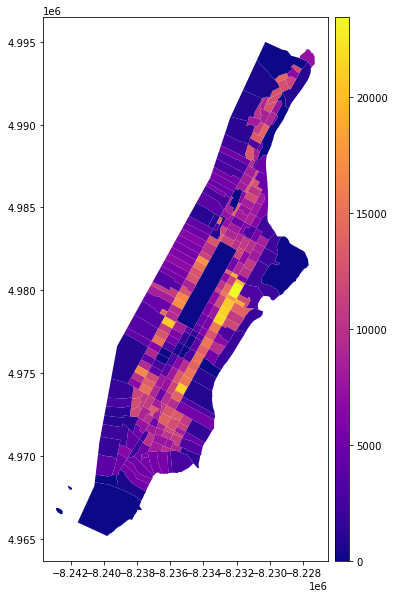

In [57]:
NY_income['income_density'] = NY_income['B25118_001E'] / (NY_income['geometry'].area / 1e+6)

from mpl_toolkits.axes_grid1 import make_axes_locatable

# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))

# These two lines make the colorbar the same size as the axes.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

NY_income.plot('income_density', ax=ax, cmap='plasma', legend=True, cax=cax)

#Question 1a - Answer: Wasco County
#Question 1b - Answer: Month 8 (August)
#Question 1c - Answer: 9
#Question 1d - Answer: Long Draw, Malheur County, 2012/07/08
#Question 1e - Answer:3315